In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### 讀入fashion_mnist

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


### 數據

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

This is Coat


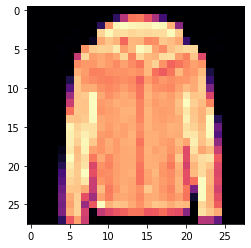

In [9]:
n = 5000
print("This is", class_names[y_train[n]])
plt.imshow(x_train[n] , cmap="magma")

### 資料整理

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [14]:
y_train[69]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 神經網路

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [17]:
model = Sequential()
model.add(Dense(87, input_dim=784, activation='relu'))
model.add(Dense(87, activation='relu'))
model.add(Dense(10, activation='softmax'))

### 組裝

In [18]:
model.compile(loss='mse', optimizer=SGD(lr=0.69), metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 87)                68295     
_________________________________________________________________
dense_4 (Dense)              (None, 87)                7656      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                880       
Total params: 76,831
Trainable params: 76,831
Non-trainable params: 0
_________________________________________________________________


### 訓練它

In [20]:
model.fit(x_train, y_train, batch_size=150, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0444 - acc: 0.6850
Epoch 2/50
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0278 - acc: 0.8113
Epoch 3/50
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0247 - acc: 0.8317
Epoch 4/50
60000/60000 [==============================] - 1s 9us/sample - loss: 0.0231 - acc: 0.8424
Epoch 5/50
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0220 - acc: 0.8503
Epoch 6/50
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0212 - acc: 0.8560
Epoch 7/50
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0204 - acc: 0.8622
Epoch 8/50
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0199 - acc: 0.8647
Epoch 9/50
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0194 - acc: 0.8691
Epoch 10/50
60000/60000 [==============================] - 1s 10us/sample - loss: 0

### 成果

In [21]:
result = model.predict_classes(x_test)

The result is: Pullover


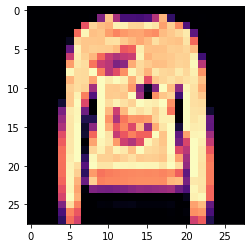

In [28]:
n = 5000

print('The result is:', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='magma')